The following network represents interaction between characters in Star Wars Episode VI: Return of the Jedi.
Each node represents a character, a link indicates that the two characters interacted in the movie more than three times.

Data for this network was obtained from [Kaggle](https://www.kaggle.com/ruchi798/star-wars) 

![Star Wars Episode VI: Return of the Jedi](images/star-wars-7.png)


- Use networkx to represent the network.
- (re)draw the network.
- Show the adjacency Matrix
- Who are the connections of `LEIA`?
- What is the distance between `KYLO REN` and `MAZ`?
- What is the largest clique in the network?

In [2]:
import networkx as nx
import pandas as pd

In [3]:
net = nx.Graph()

In [4]:
net.add_node('GENERAL HUX')
net.add_node('KYLO REN')
net.add_node('REY')
net.add_node('FINN')
net.add_node('POE')
net.add_node('HAN')
net.add_node('MAZ')
net.add_node('LEIA')
net.add_node('C-3PO')

In [5]:
# or
#net.add_nodes_from(['GENERAL HUX', 'KYLO REN', 'FINN', 'POE', 'REY', 'HAN', 'MAZ', 'C-3PO', 'LEIA'])

In [6]:
net.add_edge('GENERAL HUX', 'KYLO REN')
net.add_edge('REY', 'KYLO REN')
net.add_edge('FINN', 'REY')
net.add_edge('FINN', 'POE')
net.add_edge('FINN', 'HAN')
net.add_edge('REY', 'HAN')
net.add_edge('MAZ', 'HAN')
net.add_edge('LEIA', 'HAN')
net.add_edge('LEIA', 'C-3PO')

In [7]:
# or
# net.add_edges_from([('GENERAL HUX', 'KYLO REN'), ('KYLO REN', 'REY'), ('FINN', 'POE'), ('FINN', 'REY'), ('FINN', 'HAN'), ('REY', 'HAN'), ('HAN', 'MAZ'), ('HAN', 'LEIA'), ('C-3PO', 'LEIA')])

In [6]:
net.nodes()

NodeView(('GENERAL HUX', 'KYLO REN', 'REY', 'FINN', 'POE', 'HAN', 'MAZ', 'LEIA', 'C-3PO'))

In [7]:
net.edges()

EdgeView([('GENERAL HUX', 'KYLO REN'), ('KYLO REN', 'REY'), ('REY', 'FINN'), ('REY', 'HAN'), ('FINN', 'POE'), ('FINN', 'HAN'), ('HAN', 'MAZ'), ('HAN', 'LEIA'), ('LEIA', 'C-3PO')])

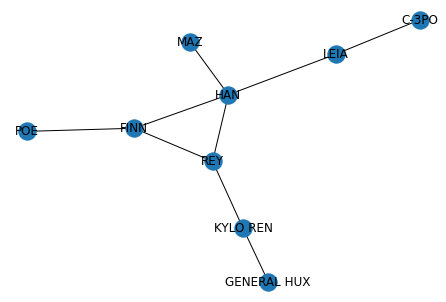

In [10]:
nx.draw(net, with_labels=True)

In [13]:
nx.adj_matrix(net).todense()

matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

Who are the connections of LEIA?
What is the distance between KYLO REN and MAZ?
What is the largest clique in the network?

In [14]:
list(net.neighbors('LEIA'))

['HAN', 'C-3PO']

In [15]:
nx.shortest_path(net, 'KYLO REN', 'MAZ')

['KYLO REN', 'REY', 'HAN', 'MAZ']

In [8]:
# largest clique with python
cliques = [c for lc in nx.cliques_containing_node(net).values() for c in lc ]
cliques = sorted(cliques, key=len, reverse=True )
cliques[0]

['HAN', 'FINN', 'REY']

In [30]:
# largest clique with pandas
cliques = nx.cliques_containing_node(net)
df = pd.DataFrame(pd.Series(cliques), columns=['cliques'])
# largest clique of each node
df['largest_clique'] = df.cliques.apply(lambda x: sorted(x, key=len, reverse=True)).str[0]
# max len of a clique
df['max_clique_length'] = df.cliques.apply(lambda x: max(len(l) for l in x))
# largest clique in the network
df.sort_values('max_clique_length', ascending=False).iloc[0, -1]

['HAN', 'FINN', 'REY']